In [81]:
import pandas as pd
import matplotlib as plt
import os

DATASET_FILENAME = os.getcwd() + '/data/compas.csv'

dataset = pd.read_csv(DATASET_FILENAME)
targets = dataset['two_year_recid']
dataset = dataset.drop('two_year_recid',axis=1)

from latextable import draw_latex
from scipy.stats import wasserstein_distance
from scorer import *
from texttable import Texttable

## Score demonstrations

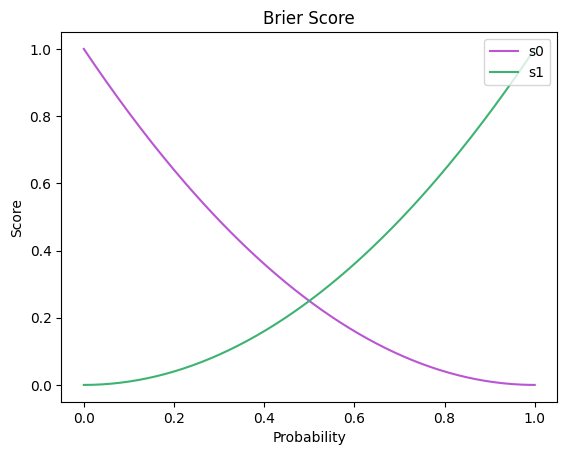

In [2]:
BrierScorer().plot()

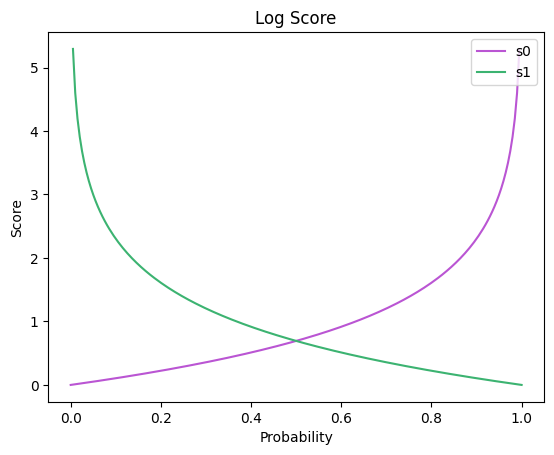

In [3]:
LogScorer().plot()

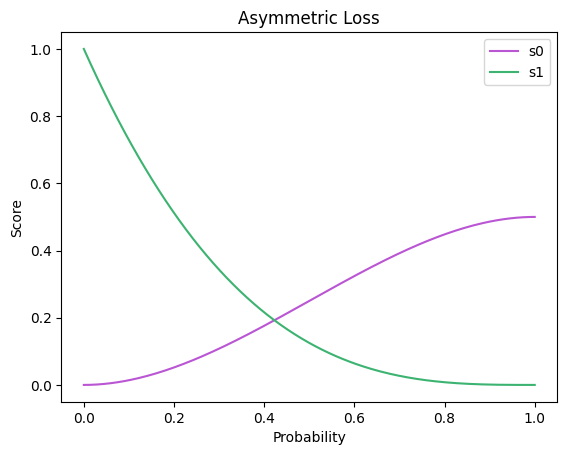

In [3]:
s0 = lambda p: p**2 * (3/2-p)
s1 = lambda p: (1-p)**3

CustomScorer(s0,s1,"Asymmetric Loss").plot()

## EMD Evaluation

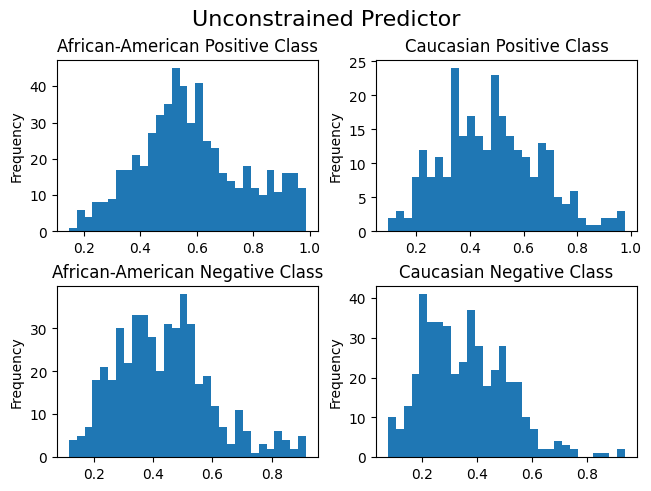

In [68]:
FILENAME = 'data/compas_predictions.csv'
df = pd.read_csv(FILENAME)
fig, axes = plt.subplots(2, 2, layout='constrained')
fig.suptitle('Unconstrained Predictor', fontsize=16)

af_am_unconstrained_1 = df[(df['race']=='African-American') & (df['two_year_recid']==1)]['unconstrained']
cauc_unconstrained_1 = df[(df['race']=='Caucasian') & (df['two_year_recid']==1)]['unconstrained']
af_am_unconstrained_0 = df[(df['race']=='African-American') & (df['two_year_recid']==0)]['unconstrained']
cauc_unconstrained_0 = df[(df['race']=='Caucasian') & (df['two_year_recid']==0)]['unconstrained']

af_am_unconstrained_1.plot(kind='hist',ax=axes[0][0],title="African-American Positive Class",bins=30)
cauc_unconstrained_1.plot(kind='hist',ax=axes[0][1],title='Caucasian Positive Class',bins=30)
af_am_unconstrained_0.plot(kind='hist',ax=axes[1][0],title='African-American Negative Class',bins=30)
cauc_unconstrained_0.plot(kind='hist',ax=axes[1][1],title='Caucasian Negative Class',bins=30)

plt.show()

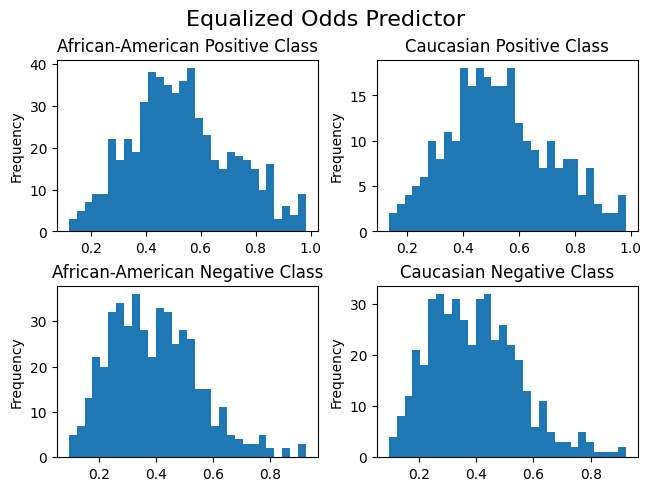

In [69]:
FILENAME = 'data/compas_predictions.csv'
df = pd.read_csv(FILENAME)
fig, axes = plt.subplots(2, 2, layout='constrained')
fig.suptitle('Equalized Odds Predictor', fontsize=16)

af_am_EO_1 = df[(df['race']=='African-American') & (df['two_year_recid']==1)]['thresholdless_EO']
cauc_EO_1 = df[(df['race']=='Caucasian') & (df['two_year_recid']==1)]['thresholdless_EO']
af_am_EO_0 = df[(df['race']=='African-American') & (df['two_year_recid']==0)]['thresholdless_EO']
cauc_EO_0 = df[(df['race']=='Caucasian') & (df['two_year_recid']==0)]['thresholdless_EO']

af_am_EO_1.plot(kind='hist',ax=axes[0][0],title="African-American Positive Class",bins=30)
cauc_EO_1.plot(kind='hist',ax=axes[0][1],title='Caucasian Positive Class',bins=30)
af_am_EO_0.plot(kind='hist',ax=axes[1][0],title='African-American Negative Class',bins=30)
cauc_EO_0.plot(kind='hist',ax=axes[1][1],title='Caucasian Negative Class',bins=30)

plt.show()

In [82]:
table = Texttable()
table.set_deco(Texttable.HEADER)
table.set_cols_dtype([
    't',
    't',
    't',
    't',
    't',
    'f'
])

table.add_row(["Predictor 1","Race 1","Predictor 2","Race 2","Class","Wasserstein Distance"])
table.add_row(["Unconstrained","African-American",
               "Unconstrained","Caucasian",
               "Positive Class",
               wasserstein_distance(af_am_unconstrained_1,cauc_unconstrained_1)])

table.add_row(["Unconstrained","African-American",
               "Unconstrained","Caucasian",
               "Negative Class",
               wasserstein_distance(af_am_unconstrained_0,cauc_unconstrained_0)])

table.add_row(["Equalized Odds","African-American",
               "Equalized Odds","Caucasian",
               "Positive Class",
               wasserstein_distance(af_am_EO_1,cauc_EO_1)])

table.add_row(["Equalized Odds","African-American",
               "Equalized Odds","Caucasian",
               "Negative Class",
               wasserstein_distance(af_am_EO_0,cauc_EO_0)])


table.add_row(["Unconstrained","African-American",
               "Equalized Odds","African-American",
               "Positive Class",
               wasserstein_distance(af_am_unconstrained_1,af_am_EO_1)])

table.add_row(["Unconstrained","African-American",
               "Equalized Odds","African-American",
               "Negative Class",
               wasserstein_distance(af_am_unconstrained_0,af_am_EO_0)])

table.add_row(["Unconstrained","Caucasian",
               "Equalized Odds","Caucasian",
               "Positive Class",
               wasserstein_distance(cauc_unconstrained_1,cauc_EO_1)])

table.add_row(["Unconstrained","Caucasian",
               "Equalized Odds","Caucasian",
               "Negative Class",
               wasserstein_distance(cauc_unconstrained_0,cauc_EO_0)])


print(table.draw())

Predictor 1   Race 1        Predictor 2   Race 2        Class         Wasserstei
                                                                      n Distance
Unconstrain   African-      Unconstrain   Caucasian     Positive      0.105     
ed            American      ed                          Class                   
Unconstrain   African-      Unconstrain   Caucasian     Negative      0.083     
ed            American      ed                          Class                   
Equalized     African-      Equalized     Caucasian     Positive      0.001     
Odds          American      Odds                        Class                   
Equalized     African-      Equalized     Caucasian     Negative      0.001     
Odds          American      Odds                        Class                   
Unconstrain   African-      Equalized     African-      Positive      0.053     
ed            American      Odds          American      Class                   
Unconstrain   African-      

In [83]:
# for latex :~)
print(draw_latex(table))

\begin{table}
	\begin{center}
		\begin{tabular}{llllll}
			 \\
			\hline
			Predictor 1 & Race 1 & Predictor 2 & Race 2 & Class & Wasserstein Distance \\
			Unconstrained & African-American & Unconstrained & Caucasian & Positive Class & 0.105 \\
			Unconstrained & African-American & Unconstrained & Caucasian & Negative Class & 0.083 \\
			Equalized Odds & African-American & Equalized Odds & Caucasian & Positive Class & 0.001 \\
			Equalized Odds & African-American & Equalized Odds & Caucasian & Negative Class & 0.001 \\
			Unconstrained & African-American & Equalized Odds & African-American & Positive Class & 0.053 \\
			Unconstrained & African-American & Equalized Odds & African-American & Negative Class & 0.041 \\
			Unconstrained & Caucasian & Equalized Odds & Caucasian & Positive Class & 0.053 \\
			Unconstrained & Caucasian & Equalized Odds & Caucasian & Negative Class & 0.041 \\
		\end{tabular}
	\end{center}
\end{table}
